In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_heartdisease = pd.read_csv("C:\\Users\\DBA\\Downloads\\heart-disease-uci\\heart.csv")

In [4]:
df_heartdisease.shape

(303, 14)

In [5]:
df_heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df_heartdisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df_heartdisease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df_heartdisease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df_heartdisease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
num_features = ['age','trestbps','chol','thalach','oldpeak']
cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

<Figure size 1800x1440 with 0 Axes>

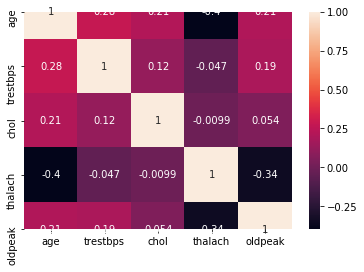

<Figure size 1800x1440 with 0 Axes>

In [11]:
import seaborn as sns

sns.heatmap(df_heartdisease[num_features].corr(method='pearson'),annot=True)
plt.figure(figsize=(25,20))

### Analysis of Categorical Features with Respect to target coulmn

In [12]:
def cat_univariate_eda(df, cat_col_names, n_cols = 3, figsize = None, save_fig = False):
    
    # univariate eda for categorical features
    n_rows = len(cat_col_names)/n_cols
    
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(cat_col_names)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        sns.countplot(df[cat_col_names[i]],hue=df['target'])
    
    if save_fig:
        plt.savefig('./cat_col_eda1.png')
    
    plt.show()

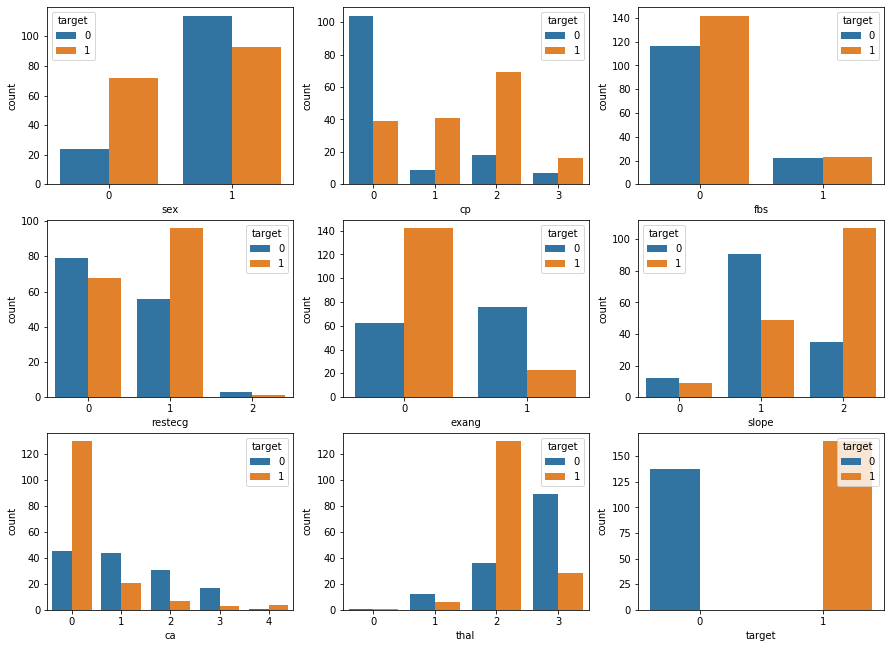

In [13]:
cat_univariate_eda(df_heartdisease,cat_features, save_fig = False)

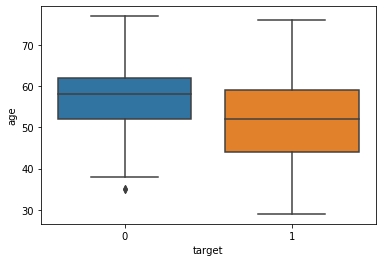

In [14]:
sns.boxplot(df_heartdisease['target'],df_heartdisease['age'])

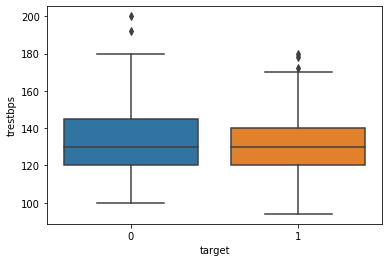

In [15]:
sns.boxplot(df_heartdisease['target'],df_heartdisease['trestbps'])

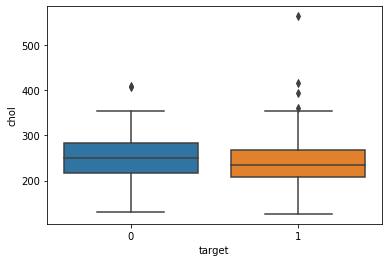

In [16]:
sns.boxplot(df_heartdisease['target'],df_heartdisease['chol'])

In [17]:
from sklearn.model_selection import train_test_split
X=pd.DataFrame(df_heartdisease[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
y=pd.DataFrame(df_heartdisease['target'])
print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


### Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.sort_values(by='Score')) 

       Specs       Score
5        fbs    0.202934
6    restecg    2.978271
12      thal    5.791853
1        sex    7.576835
10     slope    9.804095
3   trestbps   14.823925
0        age   23.286624
4       chol   23.936394
8      exang   38.914377
2         cp   62.598098
11        ca   66.440765
9    oldpeak   72.644253
7    thalach  188.320472


### Model Builiding with all features

In [20]:
from sklearn.linear_model import LogisticRegression
lmmodel = LogisticRegression()
lmmodel.fit(X_train,y_train)

C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print(lmmodel.score(X_train,y_train))
print(lmmodel.score(X_test,y_test))

0.8305785123966942
0.8688524590163934


In [22]:
lm_predictions = lmmodel.predict(X_test)
print(lm_predictions)

[1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1]


In [23]:
from sklearn.metrics import confusion_matrix,r2_score,roc_auc_score,roc_curve
confusion_matrix(lm_predictions,y_test)

array([[29,  4],
       [ 4, 24]], dtype=int64)

In [24]:
roc_auc = roc_auc_score(y_test,lm_predictions)
print(roc_auc)

0.867965367965368


In [25]:
def plot_curve(model, X_test, y_test,score, model_label):
    
    # function to plot roc curve for the given model
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

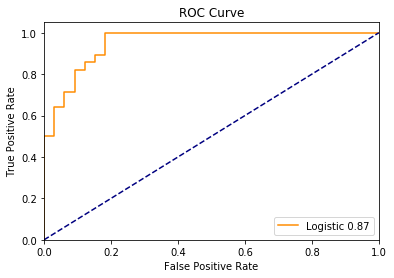

In [142]:
plot_curve(lmmodel, X_test, y_test,roc_auc, 'Logistic')

### Model Building with Top 10 Features

In [27]:
lmmodel_featureselect = LogisticRegression()
X_train_featureselect = X_train[['thalach','oldpeak','ca','cp','exang','chol','age','trestbps','slope','sex']]
X_test_featureselect = X_test[['thalach','oldpeak','ca','cp','exang','chol','age','trestbps','slope','sex']]
lmmodel_featureselect.fit(X_train_featureselect,y_train)
print(lmmodel_featureselect.score(X_train_featureselect,y_train))
print(lmmodel_featureselect.score(X_test_featureselect,y_test))

0.8429752066115702
0.8852459016393442


C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
lmfeatures_predictions = lmmodel_featureselect.predict(X_test_featureselect)
roc_auc_features = roc_auc_score(y_test,lmfeatures_predictions)
print(roc_auc_features)

0.8885281385281386


#### As observed there is no significant change in AUC score with Top 10 Features

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf_params = DecisionTreeClassifier(random_state=3)
clf_params.fit(X_train,y_train)
print(clf_params.score(X_train,y_train))
print(clf_params.score(X_test,y_test))

1.0
0.7049180327868853


In [30]:
# Optimizing the Decision tree to reduce overfitting problem

clf = DecisionTreeClassifier(max_depth=3,min_samples_split=10,random_state=3)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8388429752066116
0.7540983606557377


In [33]:
#Finding the best hyper parameters with GridSearchCV 
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split' : np.arange(5,80),'max_depth': np.arange(3, 15),'max_features': np.arange(2,12),'criterion': ['entropy', 'gini']}
clf_tree=DecisionTreeClassifier(random_state=2)
clf=GridSearchCV(clf_tree,parameters,cv=10, scoring='accuracy')
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.8382838283828383
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 16}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')


C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9049586776859504
0.9508196721311475


In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=3)
xgb.fit(X_train,y_train)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9834710743801653
0.7868852459016393


In [36]:
# As above model is overfitting the data so using GridSearchCV
parameters_xgb={'eta' : [0.001, 0.01, 0.1],'min_child_weight': np.arange(3,10,2),'subsample':[0.5,0.6,0.7,0.8] ,'max_depth': np.arange(2, 8),'colsample_bytree': [0.5,0.6,0.7,0.8,0.9]}
xgb_tree=XGBClassifier(seed=5,n_jobs=-1,n_estimators=500)
xgb_params=GridSearchCV(xgb_tree,parameters_xgb,cv=10, scoring='accuracy')
xgb_params.fit(X,y)
print(xgb_params.best_score_)
print(xgb_params.best_params_)
print(xgb_params.best_estimator_)

C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DBA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8448844884488449
{'colsample_bytree': 0.8, 'eta': 0.001, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.5}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.001, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              silent=None, subsample=0.5, verbosity=1)


In [37]:
print(xgb_params.score(X_train,y_train))
print(xgb_params.score(X_test,y_test))

0.9586776859504132
0.9836065573770492


In [128]:
predict_XGB = xgb_params.predict(X_test)
confusion_matrix(predict_XGB,y_test)

array([[32,  0],
       [ 1, 28]], dtype=int64)

In [129]:
roc_auc_XGB = roc_auc_score(y_test,predict_XGB)
print(roc_auc_XGB)

0.9848484848484849


In [113]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
tensorflow_trainX = X_train.values
tensorflow_testX = X_test.values
tensorflow_trainy = y_train.values
tensorflow_testy = y_test.values

In [40]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(tensorflow_trainX, tensorflow_trainy, epochs=150, batch_size=100, validation_split = 0.2)

Train on 193 samples, validate on 49 samples
Epoch 1/150
193/193 [==============================] - 1s 7ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - accuracy: 0.6062 - val_loss: 0.5978 - val_mean_absolute_error: 0.5978 - val_accuracy: 0.4082
Epoch 2/150
193/193 [==============================] - 0s 67us/step - loss: 0.3852 - mean_absolute_error: 0.3852 - accuracy: 0.6166 - val_loss: 0.5995 - val_mean_absolute_error: 0.5995 - val_accuracy: 0.3878
Epoch 3/150
193/193 [==============================] - 0s 67us/step - loss: 0.3863 - mean_absolute_error: 0.3863 - accuracy: 0.6114 - val_loss: 0.6021 - val_mean_absolute_error: 0.6021 - val_accuracy: 0.4082
Epoch 4/150
193/193 [==============================] - 0s 67us/step - loss: 0.3878 - mean_absolute_error: 0.3878 - accuracy: 0.6166 - val_loss: 0.6008 - val_mean_absolute_error: 0.6008 - val_accuracy: 0.4082
Epoch 5/150
193/193 [==============================] - 0s 78us/step - loss: 0.3860 - mean_absolute_error: 0.3860 - accuracy:

193/193 [==============================] - 0s 62us/step - loss: 0.3811 - mean_absolute_error: 0.3811 - accuracy: 0.6218 - val_loss: 0.5904 - val_mean_absolute_error: 0.5904 - val_accuracy: 0.4082
Epoch 41/150
193/193 [==============================] - 0s 57us/step - loss: 0.3808 - mean_absolute_error: 0.3808 - accuracy: 0.6218 - val_loss: 0.5902 - val_mean_absolute_error: 0.5902 - val_accuracy: 0.4082
Epoch 42/150
193/193 [==============================] - 0s 62us/step - loss: 0.3808 - mean_absolute_error: 0.3808 - accuracy: 0.6218 - val_loss: 0.5900 - val_mean_absolute_error: 0.5900 - val_accuracy: 0.4082
Epoch 43/150
193/193 [==============================] - 0s 67us/step - loss: 0.3807 - mean_absolute_error: 0.3807 - accuracy: 0.6218 - val_loss: 0.5895 - val_mean_absolute_error: 0.5895 - val_accuracy: 0.4286
Epoch 44/150
193/193 [==============================] - 0s 67us/step - loss: 0.3807 - mean_absolute_error: 0.3807 - accuracy: 0.6218 - val_loss: 0.5893 - val_mean_absolute_error

193/193 [==============================] - 0s 62us/step - loss: 0.3547 - mean_absolute_error: 0.3547 - accuracy: 0.6425 - val_loss: 0.5654 - val_mean_absolute_error: 0.5654 - val_accuracy: 0.4286
Epoch 80/150
193/193 [==============================] - 0s 78us/step - loss: 0.3468 - mean_absolute_error: 0.3468 - accuracy: 0.6580 - val_loss: 0.5417 - val_mean_absolute_error: 0.5417 - val_accuracy: 0.4694
Epoch 81/150
193/193 [==============================] - 0s 78us/step - loss: 0.3458 - mean_absolute_error: 0.3458 - accuracy: 0.6528 - val_loss: 0.5322 - val_mean_absolute_error: 0.5322 - val_accuracy: 0.4694
Epoch 82/150
193/193 [==============================] - 0s 67us/step - loss: 0.3407 - mean_absolute_error: 0.3407 - accuracy: 0.6528 - val_loss: 0.5474 - val_mean_absolute_error: 0.5474 - val_accuracy: 0.4490
Epoch 83/150
193/193 [==============================] - 0s 88us/step - loss: 0.3369 - mean_absolute_error: 0.3369 - accuracy: 0.6632 - val_loss: 0.5640 - val_mean_absolute_error

193/193 [==============================] - 0s 57us/step - loss: 0.2949 - mean_absolute_error: 0.2949 - accuracy: 0.7098 - val_loss: 0.4785 - val_mean_absolute_error: 0.4785 - val_accuracy: 0.5306
Epoch 118/150
193/193 [==============================] - 0s 78us/step - loss: 0.2957 - mean_absolute_error: 0.2957 - accuracy: 0.7098 - val_loss: 0.4882 - val_mean_absolute_error: 0.4882 - val_accuracy: 0.5510
Epoch 119/150
193/193 [==============================] - 0s 98us/step - loss: 0.2944 - mean_absolute_error: 0.2944 - accuracy: 0.7098 - val_loss: 0.4847 - val_mean_absolute_error: 0.4847 - val_accuracy: 0.5510
Epoch 120/150
193/193 [==============================] - 0s 78us/step - loss: 0.2941 - mean_absolute_error: 0.2941 - accuracy: 0.7098 - val_loss: 0.4851 - val_mean_absolute_error: 0.4851 - val_accuracy: 0.5510
Epoch 121/150
193/193 [==============================] - 0s 88us/step - loss: 0.2945 - mean_absolute_error: 0.2945 - accuracy: 0.7098 - val_loss: 0.4835 - val_mean_absolute_e

In [107]:
model_1 = Sequential()
model_1.add(Dense(20, input_dim=13, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [108]:
model_1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
model_1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 20)                280       
_________________________________________________________________
dense_167 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_168 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_169 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_170 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_171 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_172 (Dense)            (None, 1)               

In [114]:
model_1.fit(tensorflow_trainX, tensorflow_trainy, epochs=800, batch_size=150)

Epoch 1/800
242/242 [==============================] - 0s 41us/step - loss: 0.1687 - mean_absolute_error: 0.1687 - accuracy: 0.8306
Epoch 2/800
242/242 [==============================] - 0s 33us/step - loss: 0.1271 - mean_absolute_error: 0.1271 - accuracy: 0.8719
Epoch 3/800
242/242 [==============================] - 0s 50us/step - loss: 0.1801 - mean_absolute_error: 0.1801 - accuracy: 0.8223
Epoch 4/800
242/242 [==============================] - 0s 37us/step - loss: 0.2060 - mean_absolute_error: 0.2060 - accuracy: 0.7934
Epoch 5/800
242/242 [==============================] - 0s 45us/step - loss: 0.2012 - mean_absolute_error: 0.2012 - accuracy: 0.7975
Epoch 6/800
242/242 [==============================] - 0s 37us/step - loss: 0.1770 - mean_absolute_error: 0.1770 - accuracy: 0.8223
Epoch 7/800
242/242 [==============================] - 0s 33us/step - loss: 0.1308 - mean_absolute_error: 0.1308 - accuracy: 0.8719
Epoch 8/800
242/242 [==============================] - 0s 45us/step - loss: 

242/242 [==============================] - 0s 45us/step - loss: 0.1128 - mean_absolute_error: 0.1128 - accuracy: 0.8884
Epoch 62/800
242/242 [==============================] - 0s 37us/step - loss: 0.1111 - mean_absolute_error: 0.1111 - accuracy: 0.8926
Epoch 63/800
242/242 [==============================] - 0s 33us/step - loss: 0.1154 - mean_absolute_error: 0.1154 - accuracy: 0.8843
Epoch 64/800
242/242 [==============================] - 0s 41us/step - loss: 0.1163 - mean_absolute_error: 0.1163 - accuracy: 0.8843
Epoch 65/800
242/242 [==============================] - 0s 37us/step - loss: 0.1179 - mean_absolute_error: 0.1179 - accuracy: 0.8802
Epoch 66/800
242/242 [==============================] - 0s 41us/step - loss: 0.1183 - mean_absolute_error: 0.1183 - accuracy: 0.8843
Epoch 67/800
242/242 [==============================] - 0s 41us/step - loss: 0.1082 - mean_absolute_error: 0.1082 - accuracy: 0.8926
Epoch 68/800
242/242 [==============================] - 0s 37us/step - loss: 0.114

Epoch 122/800
242/242 [==============================] - 0s 45us/step - loss: 0.1086 - mean_absolute_error: 0.1086 - accuracy: 0.8926
Epoch 123/800
242/242 [==============================] - 0s 41us/step - loss: 0.1162 - mean_absolute_error: 0.1162 - accuracy: 0.8843
Epoch 124/800
242/242 [==============================] - 0s 54us/step - loss: 0.1112 - mean_absolute_error: 0.1112 - accuracy: 0.8843
Epoch 125/800
242/242 [==============================] - 0s 37us/step - loss: 0.1130 - mean_absolute_error: 0.1130 - accuracy: 0.8843
Epoch 126/800
242/242 [==============================] - 0s 62us/step - loss: 0.1131 - mean_absolute_error: 0.1131 - accuracy: 0.8884
Epoch 127/800
242/242 [==============================] - 0s 33us/step - loss: 0.1088 - mean_absolute_error: 0.1088 - accuracy: 0.8926
Epoch 128/800
242/242 [==============================] - 0s 41us/step - loss: 0.1065 - mean_absolute_error: 0.1065 - accuracy: 0.8926
Epoch 129/800
242/242 [==============================] - 0s 78

242/242 [==============================] - 0s 45us/step - loss: 0.1262 - mean_absolute_error: 0.1262 - accuracy: 0.8719
Epoch 183/800
242/242 [==============================] - 0s 70us/step - loss: 0.1247 - mean_absolute_error: 0.1247 - accuracy: 0.8760
Epoch 184/800
242/242 [==============================] - 0s 45us/step - loss: 0.1086 - mean_absolute_error: 0.1086 - accuracy: 0.8926
Epoch 185/800
242/242 [==============================] - 0s 45us/step - loss: 0.1113 - mean_absolute_error: 0.1113 - accuracy: 0.8843
Epoch 186/800
242/242 [==============================] - 0s 37us/step - loss: 0.1050 - mean_absolute_error: 0.1050 - accuracy: 0.8926
Epoch 187/800
242/242 [==============================] - 0s 50us/step - loss: 0.1081 - mean_absolute_error: 0.1081 - accuracy: 0.8926
Epoch 188/800
242/242 [==============================] - 0s 50us/step - loss: 0.1036 - mean_absolute_error: 0.1036 - accuracy: 0.8967
Epoch 189/800
242/242 [==============================] - 0s 95us/step - loss

242/242 [==============================] - 0s 54us/step - loss: 0.1344 - mean_absolute_error: 0.1344 - accuracy: 0.8678
Epoch 243/800
242/242 [==============================] - 0s 50us/step - loss: 0.1387 - mean_absolute_error: 0.1387 - accuracy: 0.8636
Epoch 244/800
242/242 [==============================] - 0s 70us/step - loss: 0.1286 - mean_absolute_error: 0.1286 - accuracy: 0.8719
Epoch 245/800
242/242 [==============================] - 0s 50us/step - loss: 0.1143 - mean_absolute_error: 0.1143 - accuracy: 0.8843
Epoch 246/800
242/242 [==============================] - 0s 41us/step - loss: 0.1124 - mean_absolute_error: 0.1124 - accuracy: 0.8843
Epoch 247/800
242/242 [==============================] - 0s 37us/step - loss: 0.1100 - mean_absolute_error: 0.1100 - accuracy: 0.8884
Epoch 248/800
242/242 [==============================] - ETA: 0s - loss: 0.1166 - mean_absolute_error: 0.1166 - accuracy: 0.88 - 0s 37us/step - loss: 0.1088 - mean_absolute_error: 0.1088 - accuracy: 0.8884
Epoc

242/242 [==============================] - 0s 45us/step - loss: 0.1439 - mean_absolute_error: 0.1439 - accuracy: 0.8554
Epoch 302/800
242/242 [==============================] - 0s 37us/step - loss: 0.1117 - mean_absolute_error: 0.1117 - accuracy: 0.8884
Epoch 303/800
242/242 [==============================] - ETA: 0s - loss: 0.1056 - mean_absolute_error: 0.1056 - accuracy: 0.89 - 0s 41us/step - loss: 0.1192 - mean_absolute_error: 0.1192 - accuracy: 0.8802
Epoch 304/800
242/242 [==============================] - 0s 54us/step - loss: 0.1039 - mean_absolute_error: 0.1039 - accuracy: 0.8967
Epoch 305/800
242/242 [==============================] - 0s 37us/step - loss: 0.1188 - mean_absolute_error: 0.1188 - accuracy: 0.8802
Epoch 306/800
242/242 [==============================] - 0s 37us/step - loss: 0.1301 - mean_absolute_error: 0.1301 - accuracy: 0.8719
Epoch 307/800
242/242 [==============================] - 0s 37us/step - loss: 0.1112 - mean_absolute_error: 0.1112 - accuracy: 0.8884
Epoc

242/242 [==============================] - 0s 66us/step - loss: 0.0985 - mean_absolute_error: 0.0985 - accuracy: 0.9050
Epoch 362/800
242/242 [==============================] - 0s 41us/step - loss: 0.1008 - mean_absolute_error: 0.1008 - accuracy: 0.9008
Epoch 363/800
242/242 [==============================] - 0s 37us/step - loss: 0.1058 - mean_absolute_error: 0.1058 - accuracy: 0.8967
Epoch 364/800
242/242 [==============================] - 0s 37us/step - loss: 0.1004 - mean_absolute_error: 0.1004 - accuracy: 0.9008
Epoch 365/800
242/242 [==============================] - 0s 50us/step - loss: 0.1046 - mean_absolute_error: 0.1046 - accuracy: 0.8967
Epoch 366/800
242/242 [==============================] - 0s 41us/step - loss: 0.1035 - mean_absolute_error: 0.1035 - accuracy: 0.8967
Epoch 367/800
242/242 [==============================] - 0s 45us/step - loss: 0.1050 - mean_absolute_error: 0.1050 - accuracy: 0.8967
Epoch 368/800
242/242 [==============================] - 0s 37us/step - loss

242/242 [==============================] - 0s 50us/step - loss: 0.1115 - mean_absolute_error: 0.1115 - accuracy: 0.8884
Epoch 422/800
242/242 [==============================] - 0s 50us/step - loss: 0.1018 - mean_absolute_error: 0.1018 - accuracy: 0.8967
Epoch 423/800
242/242 [==============================] - 0s 33us/step - loss: 0.1024 - mean_absolute_error: 0.1024 - accuracy: 0.8967
Epoch 424/800
242/242 [==============================] - 0s 45us/step - loss: 0.1076 - mean_absolute_error: 0.1076 - accuracy: 0.8926
Epoch 425/800
242/242 [==============================] - 0s 83us/step - loss: 0.1099 - mean_absolute_error: 0.1099 - accuracy: 0.8884
Epoch 426/800
242/242 [==============================] - 0s 45us/step - loss: 0.1120 - mean_absolute_error: 0.1120 - accuracy: 0.8884
Epoch 427/800
242/242 [==============================] - 0s 37us/step - loss: 0.1121 - mean_absolute_error: 0.1121 - accuracy: 0.8884
Epoch 428/800
242/242 [==============================] - 0s 45us/step - loss

242/242 [==============================] - 0s 41us/step - loss: 0.1040 - mean_absolute_error: 0.1040 - accuracy: 0.8967
Epoch 483/800
242/242 [==============================] - 0s 41us/step - loss: 0.1079 - mean_absolute_error: 0.1079 - accuracy: 0.8926
Epoch 484/800
242/242 [==============================] - 0s 45us/step - loss: 0.1001 - mean_absolute_error: 0.1001 - accuracy: 0.9008
Epoch 485/800
242/242 [==============================] - 0s 41us/step - loss: 0.0986 - mean_absolute_error: 0.0986 - accuracy: 0.9008
Epoch 486/800
242/242 [==============================] - 0s 41us/step - loss: 0.0980 - mean_absolute_error: 0.0980 - accuracy: 0.9050
Epoch 487/800
242/242 [==============================] - 0s 45us/step - loss: 0.1001 - mean_absolute_error: 0.1001 - accuracy: 0.9050
Epoch 488/800
242/242 [==============================] - 0s 37us/step - loss: 0.1038 - mean_absolute_error: 0.1038 - accuracy: 0.8967
Epoch 489/800
242/242 [==============================] - 0s 41us/step - loss

242/242 [==============================] - 0s 50us/step - loss: 0.1446 - mean_absolute_error: 0.1446 - accuracy: 0.8554
Epoch 543/800
242/242 [==============================] - 0s 41us/step - loss: 0.1534 - mean_absolute_error: 0.1534 - accuracy: 0.8512
Epoch 544/800
242/242 [==============================] - 0s 41us/step - loss: 0.1278 - mean_absolute_error: 0.1278 - accuracy: 0.8719
Epoch 545/800
242/242 [==============================] - 0s 50us/step - loss: 0.1179 - mean_absolute_error: 0.1179 - accuracy: 0.8843
Epoch 546/800
242/242 [==============================] - 0s 50us/step - loss: 0.1380 - mean_absolute_error: 0.1380 - accuracy: 0.8636
Epoch 547/800
242/242 [==============================] - 0s 45us/step - loss: 0.1360 - mean_absolute_error: 0.1360 - accuracy: 0.8636
Epoch 548/800
242/242 [==============================] - 0s 41us/step - loss: 0.1162 - mean_absolute_error: 0.1162 - accuracy: 0.8843
Epoch 549/800
242/242 [==============================] - 0s 58us/step - loss

242/242 [==============================] - 0s 50us/step - loss: 0.0949 - mean_absolute_error: 0.0949 - accuracy: 0.9091
Epoch 603/800
242/242 [==============================] - 0s 37us/step - loss: 0.0950 - mean_absolute_error: 0.0950 - accuracy: 0.9091
Epoch 604/800
242/242 [==============================] - 0s 37us/step - loss: 0.0954 - mean_absolute_error: 0.0954 - accuracy: 0.9050
Epoch 605/800
242/242 [==============================] - 0s 62us/step - loss: 0.0923 - mean_absolute_error: 0.0923 - accuracy: 0.9091
Epoch 606/800
242/242 [==============================] - 0s 45us/step - loss: 0.0971 - mean_absolute_error: 0.0971 - accuracy: 0.9050
Epoch 607/800
242/242 [==============================] - 0s 41us/step - loss: 0.0991 - mean_absolute_error: 0.0991 - accuracy: 0.9008
Epoch 608/800
242/242 [==============================] - 0s 41us/step - loss: 0.0940 - mean_absolute_error: 0.0940 - accuracy: 0.9091
Epoch 609/800
242/242 [==============================] - 0s 37us/step - loss

242/242 [==============================] - 0s 37us/step - loss: 0.1184 - mean_absolute_error: 0.1184 - accuracy: 0.8802
Epoch 663/800
242/242 [==============================] - 0s 33us/step - loss: 0.1551 - mean_absolute_error: 0.1551 - accuracy: 0.8430
Epoch 664/800
242/242 [==============================] - 0s 45us/step - loss: 0.1240 - mean_absolute_error: 0.1240 - accuracy: 0.8760
Epoch 665/800
242/242 [==============================] - 0s 50us/step - loss: 0.1514 - mean_absolute_error: 0.1514 - accuracy: 0.8512
Epoch 666/800
242/242 [==============================] - 0s 37us/step - loss: 0.1765 - mean_absolute_error: 0.1765 - accuracy: 0.8223
Epoch 667/800
242/242 [==============================] - 0s 54us/step - loss: 0.1466 - mean_absolute_error: 0.1466 - accuracy: 0.8512
Epoch 668/800
242/242 [==============================] - 0s 58us/step - loss: 0.1281 - mean_absolute_error: 0.1281 - accuracy: 0.8678
Epoch 669/800
242/242 [==============================] - 0s 41us/step - loss

242/242 [==============================] - 0s 33us/step - loss: 0.1103 - mean_absolute_error: 0.1103 - accuracy: 0.8884
Epoch 722/800
242/242 [==============================] - 0s 41us/step - loss: 0.1065 - mean_absolute_error: 0.1065 - accuracy: 0.8926
Epoch 723/800
242/242 [==============================] - 0s 41us/step - loss: 0.1132 - mean_absolute_error: 0.1132 - accuracy: 0.8884
Epoch 724/800
242/242 [==============================] - 0s 54us/step - loss: 0.1123 - mean_absolute_error: 0.1123 - accuracy: 0.8884
Epoch 725/800
242/242 [==============================] - 0s 45us/step - loss: 0.1079 - mean_absolute_error: 0.1079 - accuracy: 0.8926
Epoch 726/800
242/242 [==============================] - 0s 50us/step - loss: 0.0978 - mean_absolute_error: 0.0978 - accuracy: 0.9050
Epoch 727/800
242/242 [==============================] - 0s 54us/step - loss: 0.1031 - mean_absolute_error: 0.1031 - accuracy: 0.8967
Epoch 728/800
242/242 [==============================] - 0s 50us/step - loss

242/242 [==============================] - 0s 41us/step - loss: 0.0911 - mean_absolute_error: 0.0911 - accuracy: 0.9091
Epoch 782/800
242/242 [==============================] - 0s 45us/step - loss: 0.0911 - mean_absolute_error: 0.0911 - accuracy: 0.9091
Epoch 783/800
242/242 [==============================] - 0s 37us/step - loss: 0.0912 - mean_absolute_error: 0.0912 - accuracy: 0.9091
Epoch 784/800
242/242 [==============================] - 0s 45us/step - loss: 0.0911 - mean_absolute_error: 0.0911 - accuracy: 0.9091
Epoch 785/800
242/242 [==============================] - 0s 50us/step - loss: 0.0911 - mean_absolute_error: 0.0911 - accuracy: 0.9091
Epoch 786/800
242/242 [==============================] - 0s 37us/step - loss: 0.0911 - mean_absolute_error: 0.0911 - accuracy: 0.9091
Epoch 787/800
242/242 [==============================] - 0s 41us/step - loss: 0.0911 - mean_absolute_error: 0.0911 - accuracy: 0.9091
Epoch 788/800
242/242 [==============================] - 0s 37us/step - loss

In [122]:
#print(model_1.evaluate(tensorflow_trainX, tensorflow_trainy))
#print(model_1.evaluate(tensorflow_testX, tensorflow_testy))
predict_ANN = model_1.predict_classes(tensorflow_testX)

In [126]:
model_1.evaluate(tensorflow_testX, tensorflow_testy)

61/61 [==============================] - 0s 115us/step


[0.1543319726088008, 0.1543319672346115, 0.8524590134620667]

In [127]:
confusion_matrix(predict_ANN,tensorflow_testy)

array([[29,  5],
       [ 4, 23]], dtype=int64)

In [130]:
roc_auc_ANN = roc_auc_score(tensorflow_testy,predict_ANN)
print(roc_auc_ANN)

0.8501082251082251


C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-ve

C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\DBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-ve

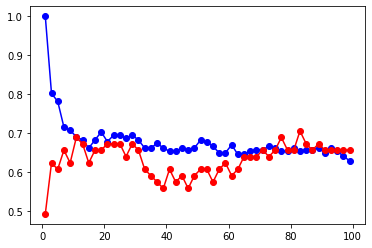

In [137]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []

K=list(range(1,100,2))
for i in K:
    KNNclass = KNeighborsClassifier(n_neighbors=i)
    KNNclass.fit(X_train,y_train)
    trainacc = np.mean(KNNclass.predict(X_train)==y_train['target'])
    testacc = np.mean(KNNclass.predict(X_test)==y_test['target'])
    accuracies.append([trainacc,testacc])
    

plt.plot(K,[i[0] for i in accuracies],"bo-")

plt.plot(K,[i[1] for i in accuracies],"ro-")

In [138]:
accuracies

[[1.0, 0.4918032786885246],
 [0.8016528925619835, 0.6229508196721312],
 [0.78099173553719, 0.6065573770491803],
 [0.7148760330578512, 0.6557377049180327],
 [0.7066115702479339, 0.6229508196721312],
 [0.6900826446280992, 0.6885245901639344],
 [0.6818181818181818, 0.6721311475409836],
 [0.6611570247933884, 0.6229508196721312],
 [0.6818181818181818, 0.6557377049180327],
 [0.7024793388429752, 0.6557377049180327],
 [0.6776859504132231, 0.6721311475409836],
 [0.6942148760330579, 0.6721311475409836],
 [0.6942148760330579, 0.6721311475409836],
 [0.6859504132231405, 0.639344262295082],
 [0.6942148760330579, 0.6721311475409836],
 [0.6818181818181818, 0.6557377049180327],
 [0.6611570247933884, 0.6065573770491803],
 [0.6611570247933884, 0.5901639344262295],
 [0.6735537190082644, 0.5737704918032787],
 [0.6611570247933884, 0.5573770491803278],
 [0.6528925619834711, 0.6065573770491803],
 [0.6528925619834711, 0.5737704918032787],
 [0.6611570247933884, 0.5901639344262295],
 [0.6570247933884298, 0.55737

In [139]:
# As we can observe XGBoost is having higher accuracy, saving and deploying the model
import pickle

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(xgb_params) 
  
# Load the pickled model 
from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
from_pickle.predict(X_test) 

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)